Correlations with Points:
Points              1.000000
GIR %               0.586007
Driving Distance    0.384565
Putting Avg        -0.464444
Name: Points, dtype: float64

Combined Regression Equation:
Points = 861.39 + (949.28 * GIR %) + (-958.66 * Putting Avg) + (0.31 * Driving Distance)

Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                 Points   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     36.24
Date:                Sat, 22 Jun 2024   Prob (F-statistic):           5.92e-12
Time:                        21:58:53   Log-Likelihood:                -224.77
No. Observations:                  48   AIC:                             457.5
Df Residuals:                      44   BIC:                             465.0
Df Model:                           3                   

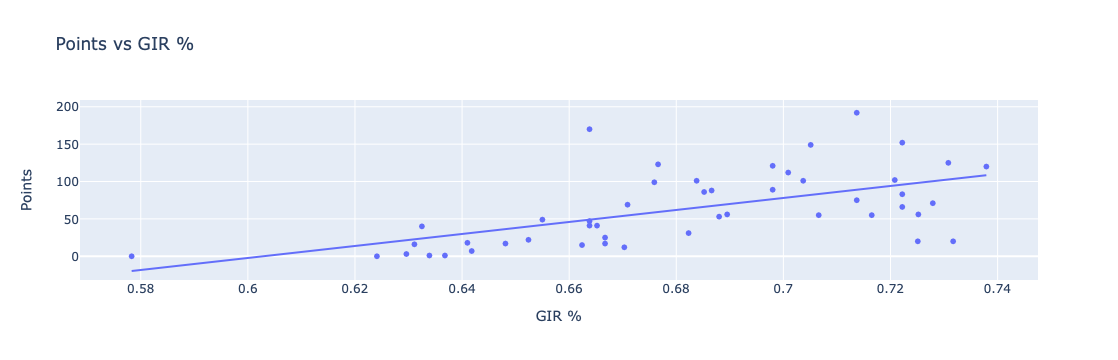

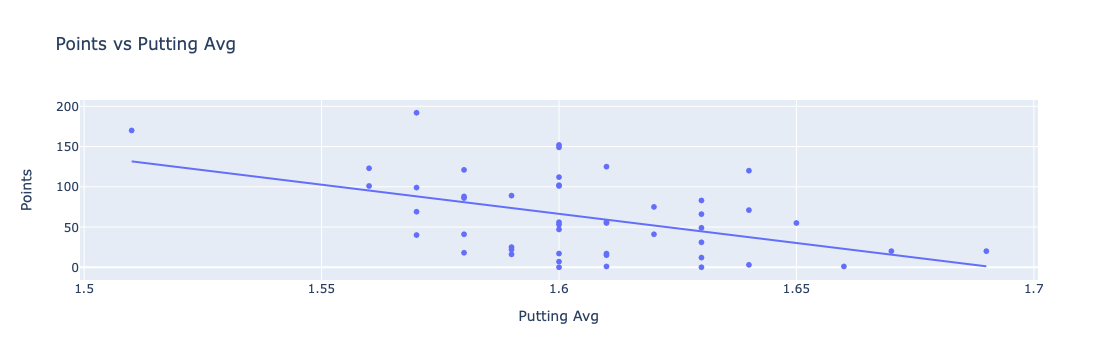

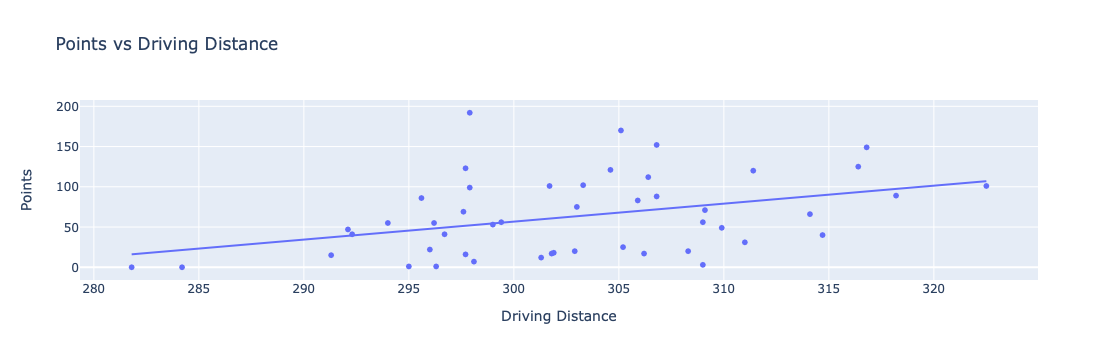

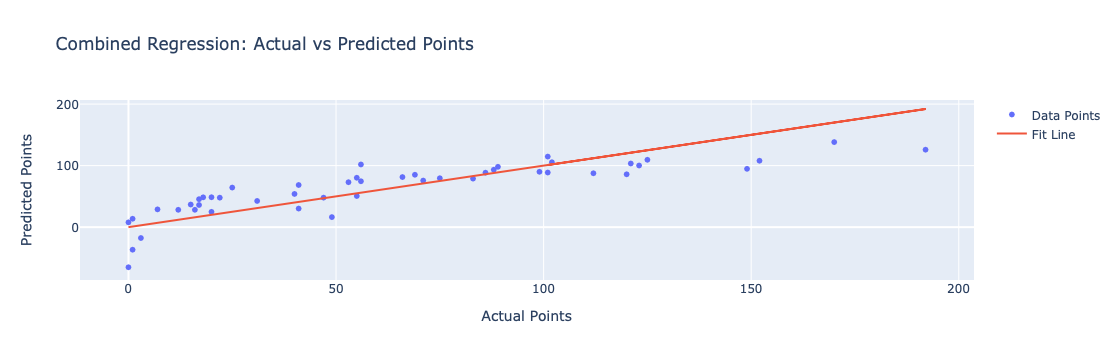

In [11]:
import pandas as pd
import statsmodels.api as sm
import plotly.express as px
import plotly.graph_objs as go

# Path to the uploaded file
file_path = 'LIV Golf Stats 2023.xlsx'
sheet_name = 'Points'

# Load the data
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Select only numeric columns for correlation and regression
numeric_df = df.select_dtypes(include='number')

# Calculate correlation of each stat to points
correlations = numeric_df.corr()['Points'].sort_values(ascending=False)

# Prepare data for regression
X = numeric_df.drop(columns=['Points'])
y = numeric_df['Points']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the combined regression model
combined_model = sm.OLS(y, X).fit()

# Generate combined regression equation
combined_equations = combined_model.params
combined_equation_str = 'Points = '
for i, param in enumerate(combined_equations):
    if i == 0:
        combined_equation_str += f'{param:.2f}'
    else:
        combined_equation_str += f' + ({param:.2f} * {X.columns[i]})'

# R-squared value for the combined model
combined_r_squared = combined_model.rsquared

# Fit individual regression models and calculate R-squared values
individual_r_squared = {}
for column in X.columns[1:]:  # Skip the constant column
    individual_X = sm.add_constant(numeric_df[[column]])
    individual_model = sm.OLS(y, individual_X).fit()
    individual_r_squared[column] = individual_model.rsquared

# Display correlations
print("Correlations with Points:")
print(correlations)

# Display combined regression equation
print("\nCombined Regression Equation:")
print(combined_equation_str)

# Display regression summary
print("\nRegression Summary:")
print(combined_model.summary())

# Display R-squared values
print("\nR-squared Values:")
print(f"Combined Model R-squared: {combined_r_squared}")
for stat, r_squared in individual_r_squared.items():
    print(f"{stat} R-squared: {r_squared}")

# Check statistical significance
print("\nStatistical Significance:")
print(f"Overall model p-value: {combined_model.f_pvalue}")
print("Individual p-values:")
for stat, p_value in combined_model.pvalues.items():
    print(f"{stat}: {p_value}")

# Check if the model is significant
if combined_model.f_pvalue < 0.05:
    print("The overall model is statistically significant.")
else:
    print("The overall model is not statistically significant.")

# Check if each stat is significant
for stat, p_value in combined_model.pvalues.items():
    if p_value < 0.05:
        print(f"{stat} is statistically significant.")
    else:
        print(f"{stat} is not statistically significant.")

# Interactive plots using Plotly
for column in X.columns[1:]:  # Skip the constant column
    fig = px.scatter(df, x=column, y='Points', trendline='ols', title=f'Points vs {column}')
    fig.show()

# Combined regression plot
y_pred = combined_model.predict(X)
fig_combined = go.Figure()

fig_combined.add_trace(go.Scatter(x=y, y=y_pred, mode='markers', name='Data Points'))
fig_combined.add_trace(go.Scatter(x=y, y=y, mode='lines', name='Fit Line'))

fig_combined.update_layout(
    title='Combined Regression: Actual vs Predicted Points',
    xaxis_title='Actual Points',
    yaxis_title='Predicted Points'
)

fig_combined.show()
